In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
train_url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"

test_url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"
 

In [ ]:
train = pd.read_csv(train_url)
train = train.set_index("PassengerId")
test = pd.read_csv(test_url)
test = test.set_index("PassengerId")

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Age, Cabin, and Embark have null values.
It seems reasonable to drop Cabin.
Age and Embark can have their null values replaced.

In [ ]:
#description of 6 columns.

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# bulid numerical and categorical pipelines separate and join them
num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())

])

In [ ]:
cat_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="most_frequent")),
                         ("encoder", OneHotEncoder(sparse=False))                       
])

In [ ]:
num_columns = ["Age", "SibSp", "Parch",	"Fare"]
cat_columns = ["Pclass", "Sex", "Embarked"]

In [ ]:
preprocess_pipeline = ColumnTransformer([
                                         ("num", num_pipeline, num_columns),
                                         ("cat", cat_pipeline, cat_columns)
])

In [ ]:
# preprocess_pipeline is in place, now we train it

X_train = preprocess_pipeline.fit_transform(train[num_columns+cat_columns])
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y_train = train["Survived"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#onto the test data now

X_test = preprocess_pipeline.fit_transform(test[num_columns+cat_columns])
y_test = forest_clf.predict(X_test)

In [ ]:
#cross validate the model
from sklearn.model_selection import cross_val_score

rf_cv_score = cross_val_score(forest_clf, X_train, y_train, cv = 10)

In [ ]:
rf_cv_score.mean()

0.8092759051186016

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train, cv = 10)
svc_scores.mean()

0.8249438202247191

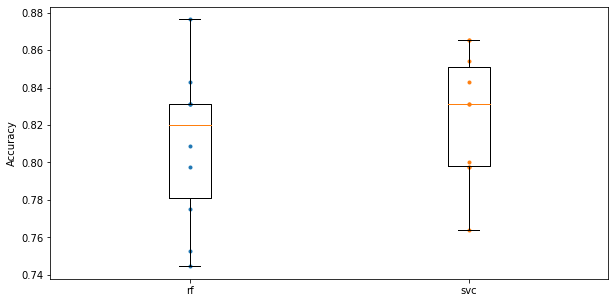

In [ ]:
#ploting a boxplot of cross_val_score to see which of the models generalized better

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot([1]*10, rf_cv_score, ".")
plt.plot([2]*10, svc_scores, ".")
plt.boxplot([rf_cv_score, svc_scores], labels = ["rf", "svc"])
plt.ylabel("Accuracy")
plt.show()

SVC cv_scores are closer in range, it seems like a more accurate generalization of the models

In [ ]:
# now lets do some more feature enginn=eering to see if a better mdoel is possible

#using BUCKETS for age

train["Agebucket"] = 15*(train["Age"]//15)
train[["Agebucket","Survived"]].groupby("Agebucket").mean()
train.drop("Age", axis=1, inplace=True)

In [ ]:
train["Onboard_relatives"] = (train["SibSp"]+train["Parch"])
train[["Onboard_relatives","Survived"]].groupby("Onboard_relatives").mean()
train.drop(["SibSp","Parch"], axis=1, inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,Agebucket,Onboard_relatives
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,S,15.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,30.0,1
3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,S,15.0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,30.0,1
5,0,3,"Allen, Mr. William Henry",male,373450,8.0500,NaN,S,30.0,0


In [ ]:
import numpy as np

In [ ]:
num_columns = ["Agebucket", "Onboard_relatives", "Fare"]
cat_columns = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
                                         ("num", num_pipeline, num_columns),
                                         ("cat", cat_pipeline, cat_columns)
])

X_train = preprocess_pipeline.fit_transform(train[num_columns+cat_columns])
X_train

array([[-0.49336646,  0.05915988, -0.50244517, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62234298,  0.05915988,  0.78684529, ...,  1.        ,
         0.        ,  0.        ],
       [-0.49336646, -0.56097483, -0.48885426, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49336646,  1.29942929, -0.17626324, ...,  0.        ,
         0.        ,  1.        ],
       [-0.49336646, -0.56097483, -0.04438104, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.62234298, -0.56097483, -0.49237783, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train, cv = 10)
svc_scores.mean()

0.8327840199750313

In [ ]:
svc_hypertune = SVC(gamma = 'auto')
svc_scores = cross_val_score(svc_hypertune, X_train, y_train, cv = 10)
svc_scores.mean()

0.8204369538077403

In [ ]:
?plt.scatter

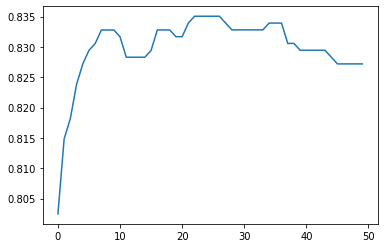

In [ ]:
score = []
for c in (np.linspace(0.1,5,50)):
  svc_hypertune = SVC(C = c, gamma = 'scale')
  svc_ht_scores = cross_val_score(svc_hypertune, X_train, y_train, cv = 10)
  score.append(svc_ht_scores.mean())
plt.plot(score)

In [ ]:
svc_hypertuned = SVC(C = 2.5, gamma = 'auto')
svc_final_scores = cross_val_score(svc_hypertuned, X_train, y_train, cv = 10)
print(f"C = {2.5}, accuracy = {svc_final_scores.mean()}")

C = 2.5, accuracy = 0.8316729088639201


In [ ]:
# can probably increase this more if we use other ensemble methods